In [9]:
import requests
from bs4 import BeautifulSoup
import random
import time

In [10]:
# Set the URL of the LinkedIn search results page
url = "https://www.linkedin.com/search/results/people/?currentCompany=%5B%223291356%22%5D&sid=TA%3B"

# Set the search filters for company and location
company_name = "Company Name"
location = "Poland"

# Set a pool of user agents
user_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.63 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/601.7.7 (KHTML, like Gecko) Version/9.1.2 Safari/601.7.7",
    "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:54.0) Gecko/20100101 Firefox/54.0",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36"
]

# Set a pool of proxy servers (optional)
proxies = [
    "http://1.2.3.4:5678",
    "https://5.6.7.8:9012"
]

# Send a GET request to the URL with random headers to prevent blocking
headers = {
    "User-Agent": random.choice(user_agents)
}

In [11]:
requests.get(url)

<Response [200]>

In [12]:
response = requests.get(url, headers=headers)

In [20]:
print(response.content)

b'<code id="dust-var-isMWebKoreaConsentEnabled" style="display: none;"><!--false--></code><!DOCTYPE html><html lang="en"><head><meta name="pageKey" content="d_registration-cold-join"><meta name="locale" content="en_US"><meta id="config"data-app-id="com.linkedin.registration-frontend.d_web"data-custom-tracking-code=""data-tracking-page-type=""data-jet-tags=""data-multiproduct-name="registration-fe"data-service-name="registration-frontend"data-app-version=""data-enable-page-view-heartbeat-tracking data-disable-comscore-tracking/><link rel="canonical" href="https://www.linkedin.com/signup"><link rel="alternate" hreflang="no" href="https://www.linkedin.com/signup?_l=no" /><link rel="alternate" hreflang="de" href="https://www.linkedin.com/signup?_l=de" /><link rel="alternate" hreflang="sv" href="https://www.linkedin.com/signup?_l=sv" /><link rel="alternate" hreflang="ru" href="https://www.linkedin.com/signup?_l=ru" /><link rel="alternate" hreflang="ko" href="https://www.linkedin.com/signup?

In [21]:
# Parse the HTML response using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

In [22]:
print(soup)

<code id="dust-var-isMWebKoreaConsentEnabled" style="display: none;"><!--false--></code><!DOCTYPE html>
<html lang="en"><head><meta content="d_registration-cold-join" name="pageKey"/><meta content="en_US" name="locale"/><meta data-app-id="com.linkedin.registration-frontend.d_web" data-app-version="" data-custom-tracking-code="" data-disable-comscore-tracking="" data-enable-page-view-heartbeat-tracking="" data-jet-tags="" data-multiproduct-name="registration-fe" data-service-name="registration-frontend" data-tracking-page-type="" id="config"><link href="https://www.linkedin.com/signup" rel="canonical"/><link href="https://www.linkedin.com/signup?_l=no" hreflang="no" rel="alternate"><link href="https://www.linkedin.com/signup?_l=de" hreflang="de" rel="alternate"/><link href="https://www.linkedin.com/signup?_l=sv" hreflang="sv" rel="alternate"/><link href="https://www.linkedin.com/signup?_l=ru" hreflang="ru" rel="alternate"/><link href="https://www.linkedin.com/signup?_l=ko" hreflang="ko"

In [16]:
# Find all the profiles on the page
profiles = soup.find_all("div", class_="search-result__info")

In [17]:
print(profiles)

[]


In [33]:
# Filter the profiles to only show employees of the specified company and location
for profile in profiles:
    company_location = profile.find("p", class_="subline-level-2").text.strip()
    company = profile.find("span", class_="search-result__truncate").text.strip()

    if location.lower() in company_location.lower() and company_name.lower() in company.lower():
        profile_url = profile.find("a")

In [37]:
print(profiles)

[]


<!DOCTYPE html>

<!--[if lt IE 7]> <html lang="en" class="ie ie6 lte9 lte8 lte7"> <![endif]-->
<!--[if IE 7]> <html lang="en" class="ie ie7 lte9 lte8 lte7"> <![endif]-->
<!--[if IE 8]> <html lang="en" class="ie ie8 lte9 lte8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie ie9 lte9"> <![endif]-->
<!--[if gt IE 9]> <html lang="en"> <![endif]-->
<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="default-src 'none'; script-src 'sha256-cLsHUHFgT/VGX04cZrJ9xgm4HbzTR7ptutkxK+7BlMk='; img-src 'self' data:; style-src 'unsafe-inline' data:" http-equiv="Content-Security-Policy"/>
<title>LinkedIn</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!--[if lte IE 9]><link rel="icon" href="/scds/common/u/images/logos/favicons/v1/favicon.ico"><![endif]--> <!--[if !IE]><!--><link href="" rel="icon"/><!--<![endif]-->
<style id="DOM_CSS" type="text/css">li-icon[type=linkedin-bug] .background{fill:#000}li-icon[type=linkedin-bug][color=bra
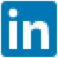
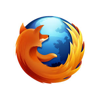
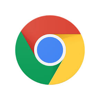
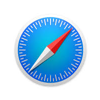

In [35]:
print(soup)